# Further Techniques
This is a collection of techniques that extend the ideas covered in the earlier notebooks.

## Setup
Import the Xarray, then open the dataset.

In [2]:
import xarray as xr
import rioxarray

In [4]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Convert a Dataset to a Data Array and Export to a Multiple-band GeoTIFF 
A single time-step can be exported as a multiple-band GeoTIFF. This requires the use of resampling and selection to drop the time variable to reduce the number of dimensions to three.

In [7]:
for year in ['2018', '2019', '2020']:
    (ds.sel(time=year)
     .to_dataarray()
     .resample(time='Y')
     .mean()
     .isel(time=0, drop=True) # Remove the time variable to allow saving to GeoTIFF
     .rio.to_raster('Data/Output/MultiBand_'+year+'.tiff')
    )

## Advanced Plot Adjustments
The NDVI will be used in the following examples.

*Note*: Putting a `;` after the last bracket in a `.plot()` command will stop additional information being printed above the plot in Jupyter notebooks.

Create the NDVI for the whole time series.

In [20]:
NDVI = (ds.nbart_nir_1 - ds.nbart_red)/(ds.nbart_nir_1 + ds.nbart_red)
NDVI.name

### Colorbar Label
The label on the colorbar in a facetgrid plot comes from the name of the data array. To change the label, either 
1. change the data array name by setting the `.name` attribute
2. use the `cbar_kwargs`in the `.plot()` function

Currently, the NDVI data array does not have a name set in the `.name` attribute, so the colorbar in a facetgrid plot will not have a label.

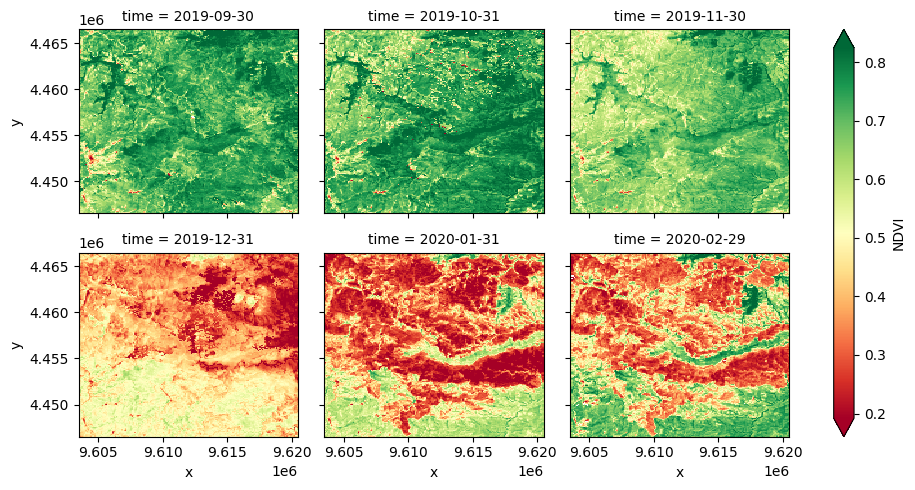

In [33]:
NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                                    cmap='RdYlGn', 
                                                    figsize=(10,5), 
                                                    robust=True, 
                                                    col_wrap=3);

Set the `.name` attribute and re-plot.

In [22]:
NDVI.name='NDVI'
NDVI.name

'NDVI'

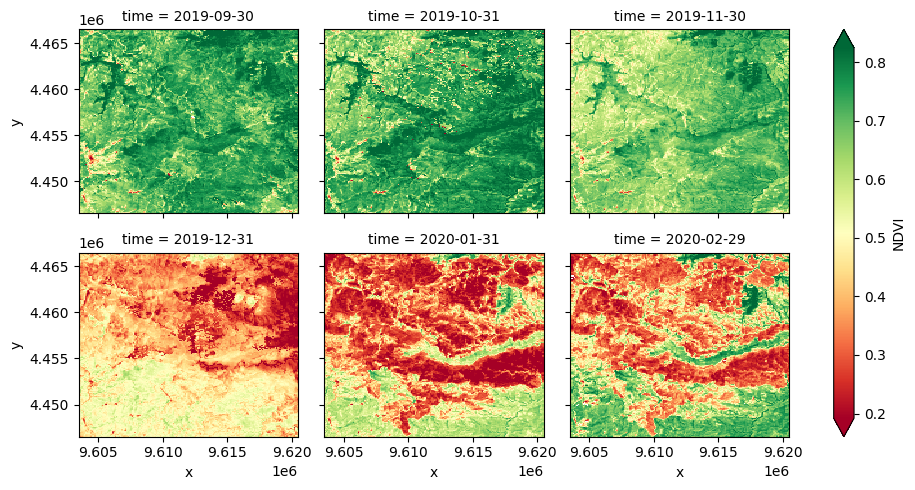

In [34]:
NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                                    cmap='RdYlGn', 
                                                    figsize=(10,5), 
                                                    robust=True, 
                                                    col_wrap=3);

Alternatively, use the `cbar_kwargs`in the `.plot()` function.

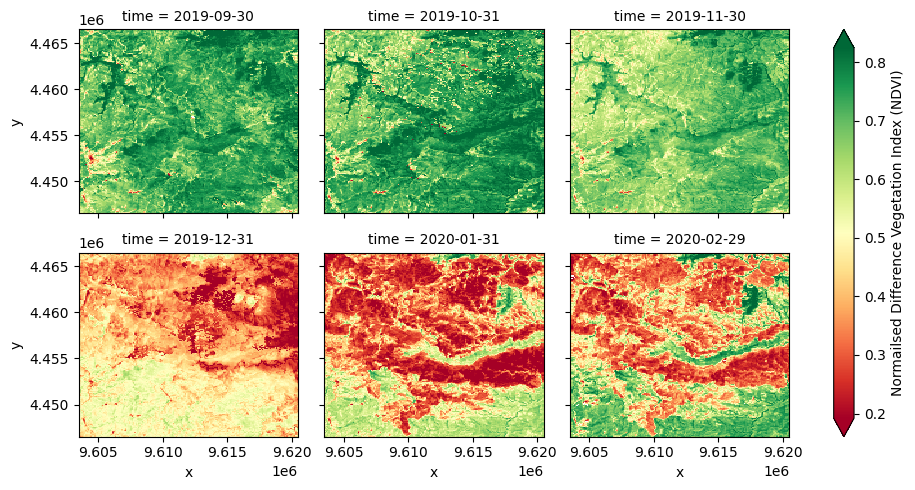

In [35]:
NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                        cmap='RdYlGn', 
                                        figsize=(10,5), 
                                        robust=True, 
                                        col_wrap=3,
                                        cbar_kwargs={'label':'Normailsed Difference Vegetation Index (NDVI)'});

### Removing Axis Labels and Tick Marks
Facetgrid plots can become cluttered due to axis ticks and labels. These can be removed of they are not required for the purpose of the plot. Creating a function and applying it to each subplot in the facet is one method.

In [6]:
def remove_labels_ticks(ax):
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    ax.set_xlabel('')
    ax.set_ylabel('')

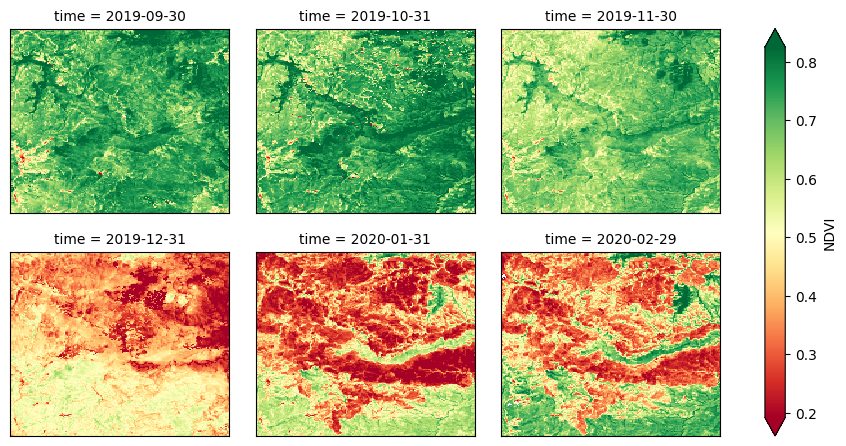

In [36]:
fg = NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                                    cmap='RdYlGn', 
                                                    figsize=(10,5), 
                                                    robust=True, 
                                                    col_wrap=3,
                                                    cbar_kwargs={'label':'NDVI'})

for i, ax in enumerate(fg.axs.flat):
        remove_labels_ticks(ax);

### Set a Title for the Whole Facetgrid
This is achieved by using the `fig.suptitle()` function. The `y` parameter sets the vertical distance above the grid. `fontsize` sets the title's font size.

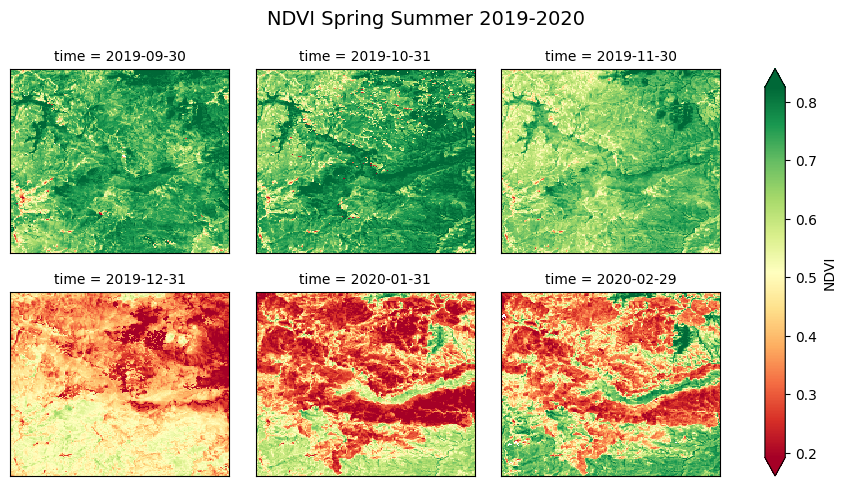

In [37]:
fg = NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                                    cmap='RdYlGn', 
                                                    figsize=(10,5), 
                                                    robust=True, 
                                                    col_wrap=3,
                                                    cbar_kwargs={'label':'NDVI'})

for i, ax in enumerate(fg.axs.flat):
        remove_labels_ticks(ax)

fg.fig.suptitle('NDVI Spring Summer 2019-2020', y=1.05, fontsize=14);

### Set Titles for the Subplots
Titles can be held in a list and then applied iteratively to each subplot.

In [28]:
subplot_titles = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']

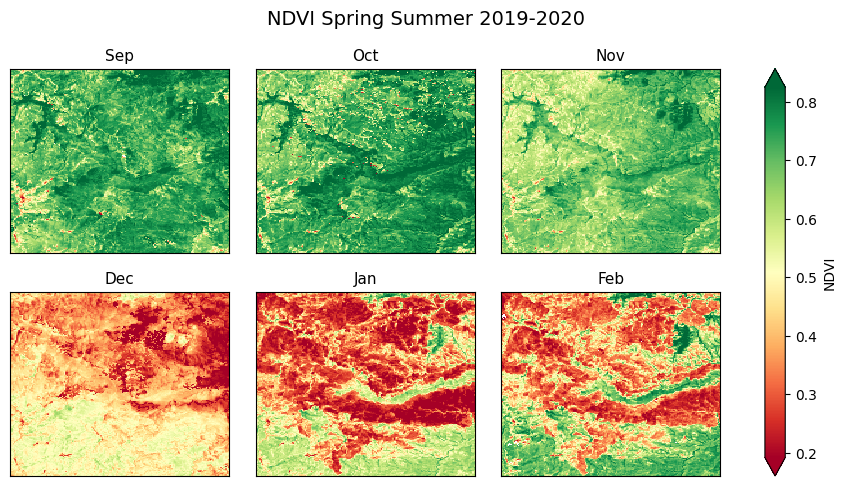

In [38]:
fg = NDVI.sel(time=slice('2019-09','2020-02')).plot(col='time', 
                                                    cmap='RdYlGn', 
                                                    figsize=(10,5), 
                                                    robust=True, 
                                                    col_wrap=3,
                                                    cbar_kwargs={'label':'NDVI'})

for i, ax in enumerate(fg.axs.flat):
        remove_labels_ticks(ax)
        ax.set_title(subplot_titles[i], fontsize=11)

fg.fig.suptitle('NDVI Spring Summer 2019-2020', y=1.05, fontsize=14);